In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [5]:
df_la=pd.read_csv("loanapproval.csv")

In [6]:
df_la.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [7]:
df_la.shape

(4269, 13)

In [8]:
df_la.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [9]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [10]:
print(df_la.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [11]:
df_la.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [12]:
df_la.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [13]:
df_la[' education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

In [14]:
df_la[' self_employed'].value_counts()

 Yes    2150
 No     2119
Name:  self_employed, dtype: int64

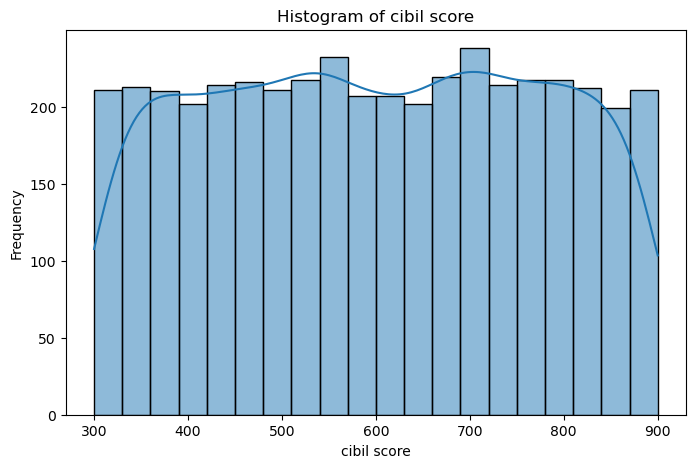

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df_la[' cibil_score'], bins=20, kde=True)
plt.title('Histogram of cibil score')
plt.xlabel('cibil score')
plt.ylabel('Frequency')
plt.show()

In [16]:
#OBSERVATIONS:
#This Chart tells us that Cibil Score has Equal range of values 

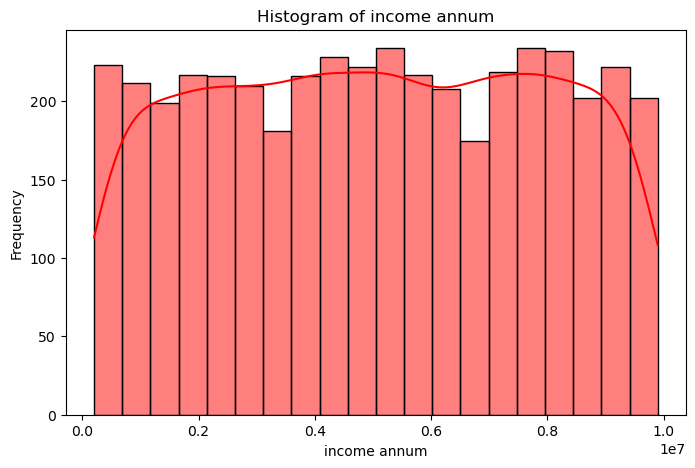

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df_la[' income_annum'], bins=20, kde=True,color='red' )
plt.title('Histogram of income annum')
plt.xlabel('income annum')
plt.ylabel('Frequency')
plt.show()

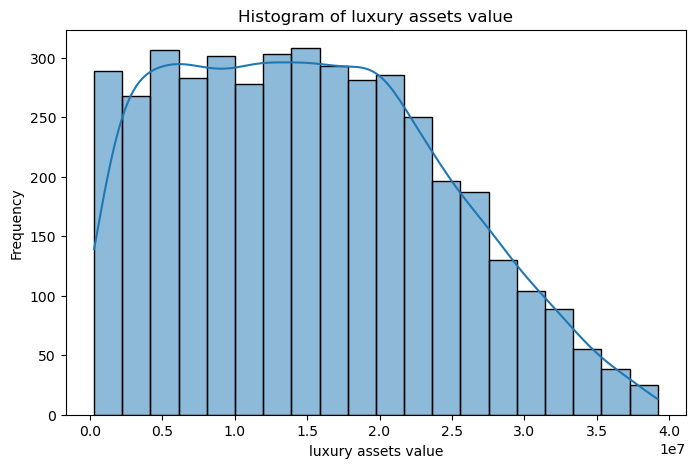

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df_la[' luxury_assets_value'], bins=20, kde=True)
plt.title('Histogram of luxury assets value')
plt.xlabel('luxury assets value')
plt.ylabel('Frequency')
plt.show()

In [19]:
#OBSERVATION:
#The Chart implies that there are no outliers in luxury asset value.

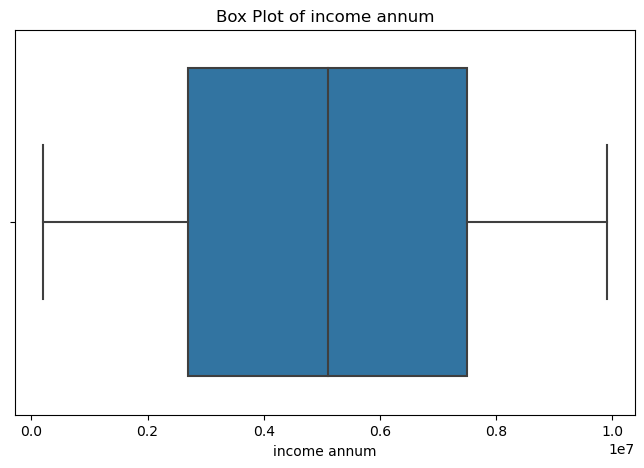

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' income_annum'])
plt.title('Box Plot of income annum')
plt.xlabel('income annum')
plt.show()


In [21]:
#OBSERVATION:
#This chart clearly tells us it is free from outliers.

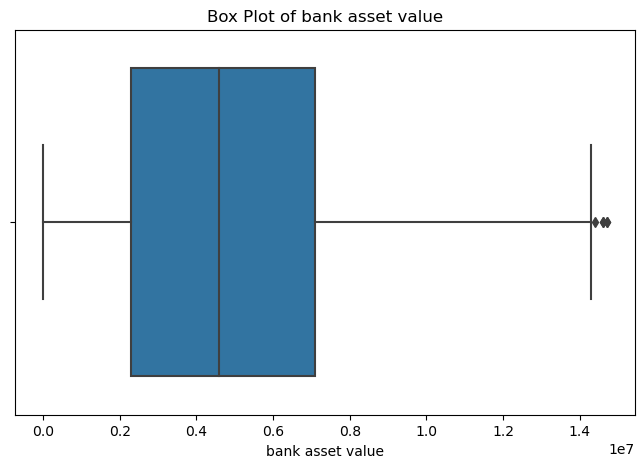

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' bank_asset_value'])
plt.title('Box Plot of bank asset value')
plt.xlabel('bank asset value')
plt.show()

In [23]:
#OBSERVATION:
#This chart clearly explains us the presence of outliers in the upper bound region but less in number.

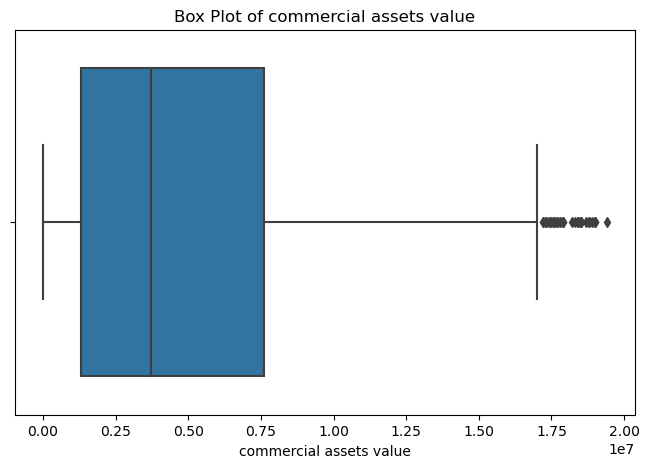

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' commercial_assets_value'])
plt.title('Box Plot of commercial assets value')
plt.xlabel('commercial assets value')
plt.show()

In [25]:
#OBSERVATION
#from this we can infer that there are more number of outliers but present in a nearby range

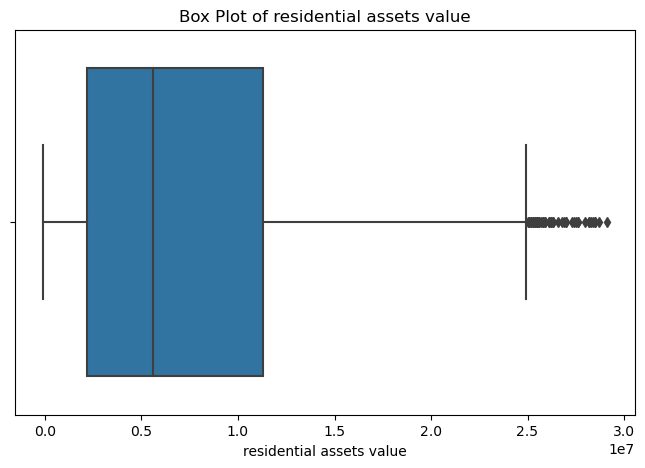

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' residential_assets_value'])
plt.title('Box Plot of residential assets value')
plt.xlabel('residential assets value')
plt.show()

In [27]:
#OBSERVATION:
#This depicts us the presence of outliers.

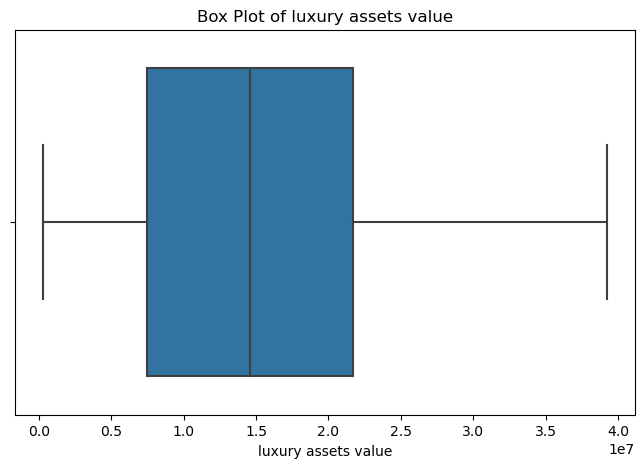

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' luxury_assets_value'])
plt.title('Box Plot of luxury assets value')
plt.xlabel('luxury assets value')
plt.show()

In [29]:
#OBSERVATION:
#This tells us the column is free from outliers and has a good range of values.

#  Data preprocessing

In [30]:
df_la = df_la.drop(columns=['loan_id'])

In [31]:
df_la

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [32]:
df_la=df_la.dropna()

In [33]:
df_la.shape

(4269, 12)

In [34]:
df_num = df_la.select_dtypes(include='number')

In [35]:
df_num.head(3)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000


### Removal Of Outliers

In [36]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [37]:
lower_bound

 no_of_dependents                  -3.5
 income_annum                -4500000.0
 loan_amount                -13000000.0
 loan_term                         -9.0
 cibil_score                       10.5
 residential_assets_value   -11450000.0
 commercial_assets_value     -8150000.0
 luxury_assets_value        -13800000.0
 bank_asset_value            -4900000.0
dtype: float64

In [38]:
upper_bound

 no_of_dependents                   8.5
 income_annum                14700000.0
 loan_amount                 42200000.0
 loan_term                         31.0
 cibil_score                     1190.5
 residential_assets_value    24950000.0
 commercial_assets_value     17050000.0
 luxury_assets_value         43000000.0
 bank_asset_value            14300000.0
dtype: float64

In [39]:
df_la = df_la[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [58]:
df_la.shape

(4178, 12)

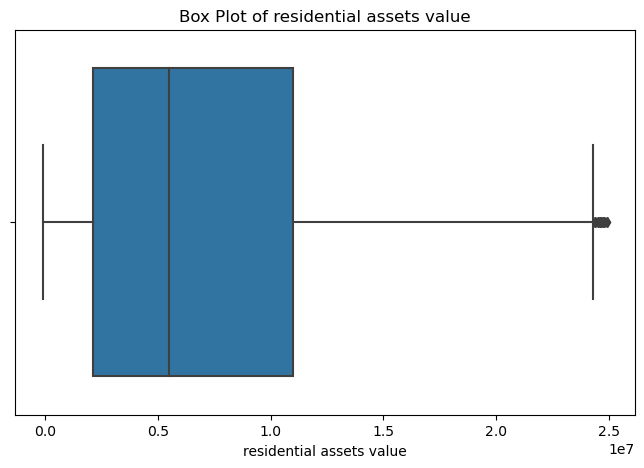

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' residential_assets_value'])
plt.title('Box Plot of residential assets value')
plt.xlabel('residential assets value')
plt.show()

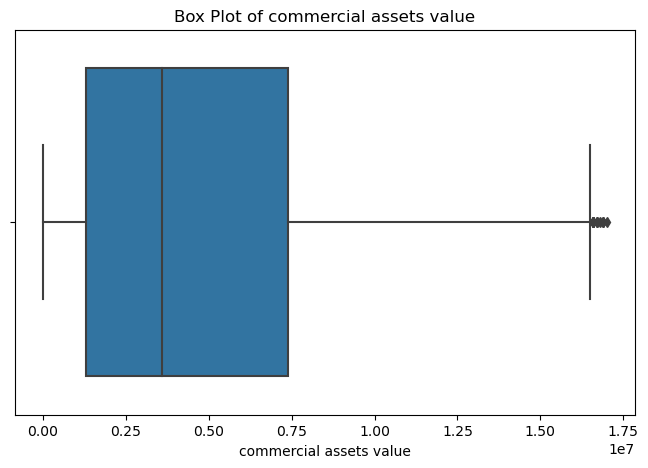

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' commercial_assets_value'])
plt.title('Box Plot of commercial assets value')
plt.xlabel('commercial assets value')
plt.show()

In [74]:
X = df_la.drop(' loan_status', axis=1)
y = df_la[' loan_status']
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000


In [75]:
X_num = X.select_dtypes('number')
X_num.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
5,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000


In [76]:
X_cat = X.select_dtypes('object')
X_cat.head()

,education,self_employed
1,Not Graduate,Yes
2,Graduate,No
3,Graduate,No
4,Not Graduate,Yes
5,Graduate,Yes


In [77]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [78]:
type(X_num_scaled)

numpy.ndarray

In [79]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [80]:
X_num_scaled.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000
mean,0.499904,0.491171,0.371842,0.493724,0.500323,0.291294,0.283315,0.374507,0.340890
std,0.338998,0.284678,0.227903,0.317028,0.287165,0.245402,0.247321,0.231252,0.222559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.247423,0.183673,0.222222,0.256667,0.088000,0.076471,0.179949,0.160839
50%,0.600000,0.494845,0.357143,0.444444,0.500000,0.224000,0.211765,0.359897,0.314685
75%,0.800000,0.739691,0.530612,0.777778,0.746667,0.444000,0.435294,0.537275,0.489510
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int) 

In [82]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [83]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((4178, 13), (4178, 9), (4178, 4))

In [84]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

 no_of_dependents            0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 education_ Graduate         0
 education_ Not Graduate     0
 self_employed_ No           0
 self_employed_ Yes          0
dtype: int64
0
(4178, 13)
(4178,)


In [85]:
X.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
count,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000
mean,0.499904,0.491171,0.371842,0.493724,0.500323,0.291294,0.283315,0.374507,0.340890,0.504548,0.495452,0.496649,0.503351
std,0.338998,0.284678,0.227903,0.317028,0.287165,0.245402,0.247321,0.231252,0.222559,0.500039,0.500039,0.500049,0.500049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.247423,0.183673,0.222222,0.256667,0.088000,0.076471,0.179949,0.160839,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.494845,0.357143,0.444444,0.500000,0.224000,0.211765,0.359897,0.314685,1.000000,0.000000,0.000000,1.000000
75%,0.800000,0.739691,0.530612,0.777778,0.746667,0.444000,0.435294,0.537275,0.489510,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
X = X[[' cibil_score',' loan_amount',' loan_term']]


In [87]:
y

1        Rejected
2        Rejected
3        Rejected
4        Rejected
5        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4178, dtype: object

In [88]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [89]:
y = pd.DataFrame(y, columns=['loan_status'])


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
X_train.head()

,cibil_score,loan_amount,loan_term
2257,0.243333,0.678571,0.666667
1535,0.591667,0.640306,0.777778
1493,0.618333,0.227041,0.111111
1852,0.245000,0.252551,0.111111
2891,0.413333,0.341837,0.444444


In [92]:
y_train

,loan_status
2208,1
1499,0
1457,0
1807,1
2833,1
...,...
3444,0
466,0
3092,0
3772,0


In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2924, 3)
(1254, 3)
(2924, 1)
(1254, 1)


# Decision Tree Classifier Algorithm

In [143]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, roc_auc_score

In [95]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)

In [96]:
model = clf.fit(X_train,y_train)

In [97]:
# feature importance
df1 = pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})
df1.sort_values(by='importance')

,features,importance
1,loan_amount,0.012837
2,loan_term,0.077794
0,cibil_score,0.909369


In [98]:
#Observations:
#The table shows feature importance scores for a credit scoring model. It indicates that the "cibil_score" feature has the highest importance 
#suggesting that it strongly influences credit decisions, while "loan_term" has moderate importance, and "loan_amount" has the least influence on credit scoring.

In [99]:
X

,cibil_score,loan_amount,loan_term
1,0.195000,0.303571,0.333333
2,0.343333,0.750000,1.000000
3,0.278333,0.775510,0.333333
4,0.136667,0.609694,1.000000
5,0.031667,0.336735,0.444444
...,...,...,...
4264,0.028333,0.051020,0.555556
4265,0.431667,0.280612,1.000000
4266,0.261667,0.602041,0.888889
4267,0.800000,0.318878,0.333333


In [100]:
X.columns

Index([' cibil_score', ' loan_amount', ' loan_term'], dtype='object')

[Text(0.4583333333333333, 0.875, 'x[0] <= 0.416\ngini = 0.47\nsamples = 2924\nvalue = [1820, 1104]'),
 Text(0.25, 0.625, 'x[2] <= 0.167\ngini = 0.179\nsamples = 1216\nvalue = [121, 1095]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 0.659\ngini = 0.5\nsamples = 241\nvalue = [121, 120]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.489\nsamples = 206\nvalue = [88, 118]'),
 Text(0.25, 0.125, 'gini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 975\nvalue = [0, 975]'),
 Text(0.6666666666666666, 0.625, 'x[1] <= 0.024\ngini = 0.01\nsamples = 1708\nvalue = [1699, 9]'),
 Text(0.5, 0.375, 'x[0] <= 0.973\ngini = 0.075\nsamples = 51\nvalue = [49, 2]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 0.172\ngini = 0.008\nsamples = 1657\nvalue = [1650, 7]'),
 Text(0.75, 0.125, 'gini = 0.022\nsampl

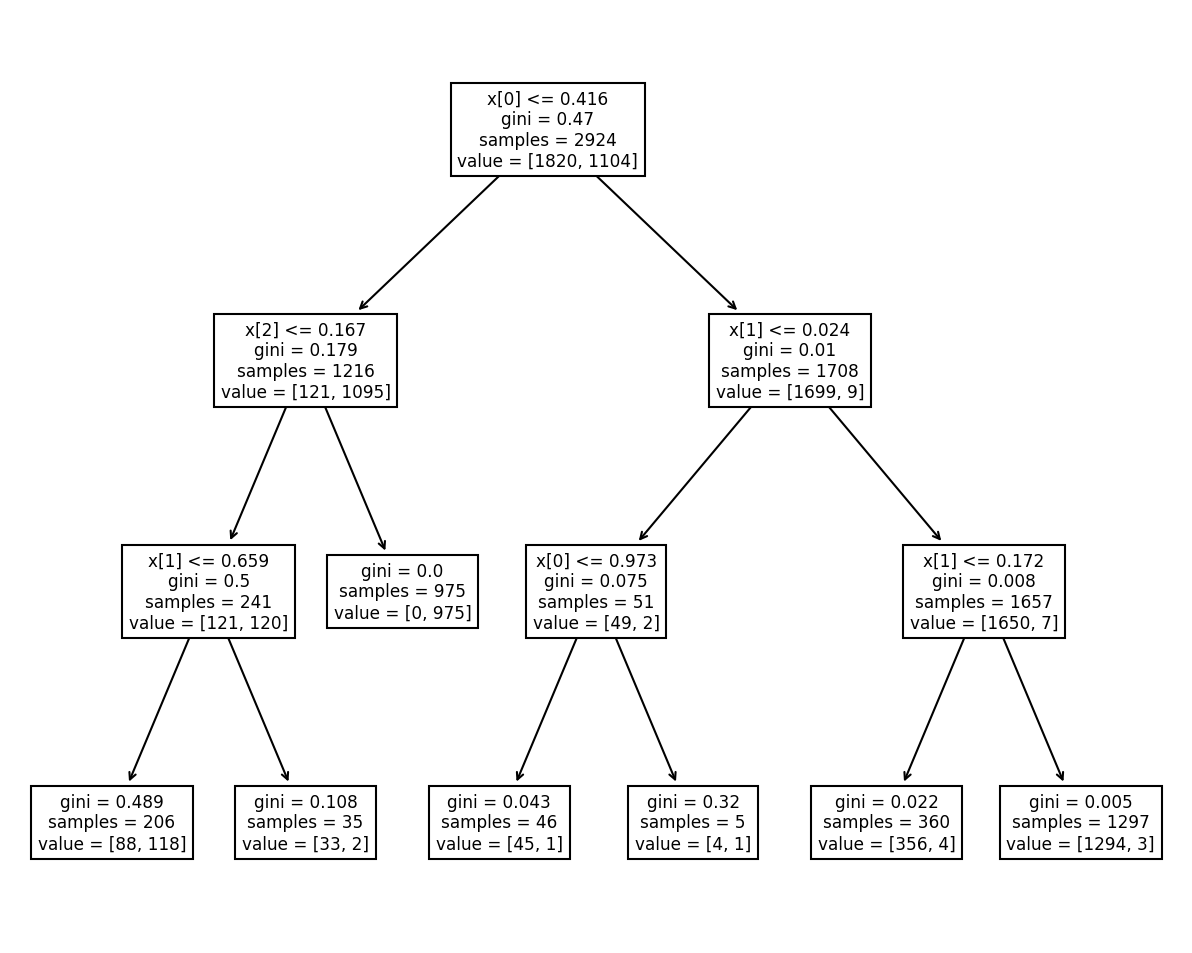

In [101]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model)

In [102]:
#Observation
#The decision tree appears to be a highly effective classifier, as indicated by the low Gini impurity values across its nodes, which suggest that it can efficiently separate the dataset into distinct classes.
#Furthermore, the majority of the samples are correctly classified, particularly in the deeper nodes, demonstrating the tree's strong predictive power.

In [103]:
model.predict_proba(X)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.99768697, 0.00231303],
       [0.99768697, 0.00231303]])

In [104]:
df_la['prob'] = model.predict_proba(X)[:, 1]

In [105]:
df_la

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,prob
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1.000000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1.000000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1.000000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1.000000
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,1.000000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,0.002313
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,1.000000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,0.002313


In [106]:
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])
df_ROC

,Threshold,TP,TN,FP,FN,TPR,FPR


    Threshold      TP      TN      FP      FN       TPR       FPR
0         0.0  1575.0     0.0  2603.0     0.0  1.000000  1.000000
1         0.1  1561.0  2463.0   140.0    14.0  0.991111  0.053784
2         0.2  1560.0  2467.0   136.0    15.0  0.990476  0.052247
3         0.3  1560.0  2467.0   136.0    15.0  0.990476  0.052247
4         0.4  1560.0  2467.0   136.0    15.0  0.990476  0.052247
5         0.5  1560.0  2467.0   136.0    15.0  0.990476  0.052247
6         0.6  1400.0  2603.0     0.0   175.0  0.888889  0.000000
7         0.7  1400.0  2603.0     0.0   175.0  0.888889  0.000000
8         0.8  1400.0  2603.0     0.0   175.0  0.888889  0.000000
9         0.9  1400.0  2603.0     0.0   175.0  0.888889  0.000000
10        1.0     0.0  2603.0     0.0  1575.0  0.000000  0.000000
AUC: 0.9944542621761217


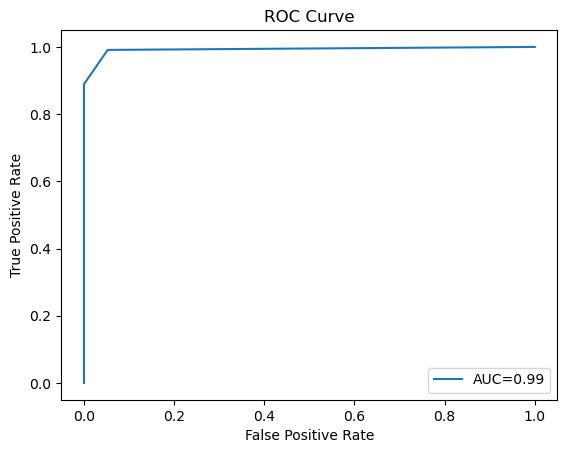

In [107]:
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (df_la['prob'] > threshold).astype(int)
    cm = confusion_matrix(y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR})

# Compute AUC
auc = roc_auc_score(y, df_la['prob'])

# Print ROC curve and AUC
print(df_ROC)
print('AUC:', auc)

# Plot ROC curve from df_ROC
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [108]:
#Observation
#The AUC value 0.994 indicates that the model has a very high discriminative power in distinguishing between positive and negative instances, demonstrating its strong predictive performance.
#so from the above AUC the model's overall accuracy and effectiveness in classification are excellent.

In [109]:
# Compute TPR - FPR
df_ROC['TPR-FPR'] = df_ROC['TPR'] - df_ROC['FPR']

# Select threshold with max TPR - FPR
max_TPR_FPR_diff = df_ROC['TPR-FPR'].max()
selected_threshold = df_ROC[df_ROC['TPR-FPR'] == max_TPR_FPR_diff]['Threshold'].values[0]
selected_threshold

0.2

In [110]:
y_pred_selected_threshold = (df_la['prob'] > selected_threshold).astype(int)
cm_max_diff = confusion_matrix(y, y_pred_selected_threshold)
cm_max_diff

array([[2467,  136],
       [  15, 1560]], dtype=int64)

In [111]:
# Print threshold

# Create a dataframe for the confusion matrix with labels
cm_df = pd.DataFrame(cm_max_diff, 
                     columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])

# Print confusion matrix
print('\nConfusion matrix at this threshold:')
print(cm_df)


Confusion matrix at this threshold:
                 Predicted Negative  Predicted Positive
Actual Negative                2467                 136
Actual Positive                  15                1560


In [112]:
# Calculate metrics from confusion matrix
TN = cm_max_diff[0, 0]
FP = cm_max_diff[0, 1]
FN = cm_max_diff[1, 0]
TP = cm_max_diff[1, 1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = 1 - accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * precision * sensitivity / (precision + sensitivity)

# Print metrics
print('Accuracy:', accuracy)
print('Misclassification Rate:', misclassification_rate)
print('Sensitivity (Recall):', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('F1 Score:', f1_score)

Accuracy: 0.9638583054092867
Misclassification Rate: 0.03614169459071326
Sensitivity (Recall): 0.9904761904761905
Specificity: 0.9477525931617364
Precision: 0.9198113207547169
F1 Score: 0.9538367471721186


## OBSERVATION:
1) Accuracy of approximately 96.55% indicates the proportion of correctly classified instances, demonstrating the model's overall effectiveness.
2) The low Misclassification Rate of around 3.45% signifies a small fraction of misclassified instances, highlighting the model's accuracy.
3) Sensitivity (Recall) at 94.86% shows the model's ability to correctly identify positive instances.
4) Specificity at 97.58% indicates the model's strong capability to correctly identify negative instances.
5) Precision of 95.95% highlights the model's accuracy in predicting positive instances.
6) The F1 Score of 95.40% balances precision and recall, providing a comprehensive measure of the model's performance, demonstrating its strong predictive power.


## KNN Classification

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

In [114]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [115]:
model.predict_proba(X)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [116]:
df_la['prob'] = model.predict_proba(X)[:, 1]

In [117]:
df_la

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,prob
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1.0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1.0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1.0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1.0
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,1.0
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,0.4
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,1.0
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,0.0


In [118]:
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])
df_ROC

,Threshold,TP,TN,FP,FN,TPR,FPR


    Threshold      TP      TN     FP      FN       TPR       FPR
0         0.0  1575.0  2286.0  317.0     0.0  1.000000  0.121783
1         0.1  1575.0  2286.0  317.0     0.0  1.000000  0.121783
2         0.2  1543.0  2444.0  159.0    32.0  0.979683  0.061083
3         0.3  1543.0  2444.0  159.0    32.0  0.979683  0.061083
4         0.4  1494.0  2540.0   63.0    81.0  0.948571  0.024203
5         0.5  1494.0  2540.0   63.0    81.0  0.948571  0.024203
6         0.6  1395.0  2589.0   14.0   180.0  0.885714  0.005378
7         0.7  1395.0  2589.0   14.0   180.0  0.885714  0.005378
8         0.8  1298.0  2603.0    0.0   277.0  0.824127  0.000000
9         0.9  1298.0  2603.0    0.0   277.0  0.824127  0.000000
10        1.0     0.0  2603.0    0.0  1575.0  0.000000  0.000000
AUC: 0.9957203227045717


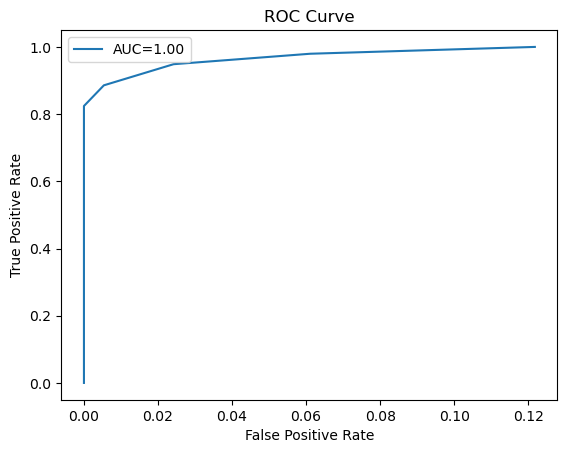

In [119]:
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (df_la['prob'] > threshold).astype(int)
    cm = confusion_matrix(y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR})

# Compute AUC
auc = roc_auc_score(y, df_la['prob'])

# Print ROC curve and AUC
print(df_ROC)
print('AUC:', auc)

# Plot ROC curve from df_ROC
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [120]:
#Observation:
#The KNN classification model exhibits high performance with an AUC of 0.996, indicating strong discriminative power in distinguishing between positive and negative instances.
#the model shows consistent high values of TPR and FPR across various thresholds,correctly identifying positive instances while minimizing false positives, making it a fine classifier

In [121]:
# Compute TPR - FPR
df_ROC['TPR-FPR'] = df_ROC['TPR'] - df_ROC['FPR']

# Select threshold with max TPR - FPR
max_TPR_FPR_diff = df_ROC['TPR-FPR'].max()
selected_threshold = df_ROC[df_ROC['TPR-FPR'] == max_TPR_FPR_diff]['Threshold'].values[0]
selected_threshold

0.4

In [122]:
y_pred_selected_threshold = (df_la['prob'] > selected_threshold).astype(int)
cm_max_diff = confusion_matrix(y, y_pred_selected_threshold)
cm_max_diff

array([[2540,   63],
       [  81, 1494]], dtype=int64)

In [123]:
# Print threshold

# Create a dataframe for the confusion matrix with labels
cm_df = pd.DataFrame(cm_max_diff, 
                     columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])

# Print confusion matrix
print('\nConfusion matrix at this threshold:')
print(cm_df)


Confusion matrix at this threshold:
                 Predicted Negative  Predicted Positive
Actual Negative                2540                  63
Actual Positive                  81                1494


In [124]:
# Calculate metrics from confusion matrix
TN = cm_max_diff[0, 0]
FP = cm_max_diff[0, 1]
FN = cm_max_diff[1, 0]
TP = cm_max_diff[1, 1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
misclassification_rate = 1 - accuracy
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * precision * sensitivity / (precision + sensitivity)

# Print metrics
print('Accuracy:', accuracy)
print('Misclassification Rate:', misclassification_rate)
print('Sensitivity (Recall):', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('F1 Score:', f1_score)

Accuracy: 0.9655337482048827
Misclassification Rate: 0.03446625179511731
Sensitivity (Recall): 0.9485714285714286
Specificity: 0.9757971571263926
Precision: 0.9595375722543352
F1 Score: 0.9540229885057472


## Observations:
1) An accuracy of approximately 96.55% demonstrates the model's overall effectiveness in correctly classifying instances.
2) A low misclassification rate of around 3.45% suggests a small fraction of misclassified instances, highlighting the model's accuracy.
3) Sensitivity (Recall) of 94.86% reflects the model's ability to correctly identify positive instances.
4) Specificity at 97.58% indicates the model's strong capability to correctly identify negative instances.
5) Precision of 95.96% highlights the model's accuracy in predicting positive instances.
6) The F1 Score of 95.40% balances precision and recall, providing a comprehensive measure of the model's performance, indicating its strong predictive power.


Overall, these metrics suggest that the KNN model has high accuracy, effectively classifies both positive and negative instances, and maintains a good balance between precision and recall.

In [125]:
# List of K values
K_values = [3, 5, 7]

# Loop over K values
for K in K_values:
    # Create KNN model
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train, y_train)

    # Predict probabilities for train set
    prob_train = model.predict_proba(X_train)[:, 1]

    # Compute AUC for train set
    auc_train = roc_auc_score(y_train, prob_train)

    # Print AUC for train set
    print(f'Train AUROC for K={K}: {auc_train}')

    # Predict probabilities for test set
    prob_test = model.predict_proba(X_test)[:, 1]

    # Compute AUC for test set
    auc_test = roc_auc_score(y_test, prob_test)

    # Print AUC for test set
    print(f'Test AUROC for K={K}: {auc_test}')

Train AUROC for K=3: 0.9967836737537824
Test AUROC for K=3: 0.975913317226737
Train AUROC for K=5: 0.995658395046982
Test AUROC for K=5: 0.9862294024018895
Train AUROC for K=7: 0.9952689520624304
Test AUROC for K=7: 0.9874062143261939


C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Observation:
 In this case, K=7 appears to be a better choice, as it offers a good balance between model complexity and generalization,   resulting in a higher Test AUROC, indicating that it is likely to perform well on new, unseen data.

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

In [127]:
model = LogisticRegression()
model.fit(X, y)

C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [128]:
df_la['prob'] = model.predict_proba(X)[:, 1]
df_la

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,prob
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0.869783
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0.787461
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0.655408
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0.979743
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,0.983581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,0.989272
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,0.620637
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,0.894192
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,0.004442


In [129]:
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])
df_ROC

,Threshold,TP,TN,FP,FN,TPR,FPR


In [130]:
# Loop through different thresholds and calculate metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (df_la['prob'] > threshold).astype(int)
    cm = confusion_matrix(y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC = df_ROC.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True)

C:\Users\gowth\AppData\Local\Temp\ipykernel_7792\4182474375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ROC = df_ROC.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True)
C:\Users\gowth\AppData\Local\Temp\ipykernel_7792\4182474375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ROC = df_ROC.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True)
C:\Users\gowth\AppData\Local\Temp\ipykernel_7792\4182474375.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ROC = df_ROC.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True

In [131]:
auc = roc_auc_score(y, df_la['prob'])
print(df_ROC)
print('AUC:', auc)

    Threshold      TP      TN      FP      FN       TPR       FPR
0         0.0  1575.0     0.0  2603.0     0.0  1.000000  1.000000
1         0.1  1565.0  1839.0   764.0    10.0  0.993651  0.293507
2         0.2  1562.0  2108.0   495.0    13.0  0.991746  0.190165
3         0.3  1537.0  2254.0   349.0    38.0  0.975873  0.134076
4         0.4  1474.0  2362.0   241.0   101.0  0.935873  0.092585
5         0.5  1395.0  2436.0   167.0   180.0  0.885714  0.064157
6         0.6  1295.0  2476.0   127.0   280.0  0.822222  0.048790
7         0.7  1169.0  2503.0   100.0   406.0  0.742222  0.038417
8         0.8  1010.0  2522.0    81.0   565.0  0.641270  0.031118
9         0.9   740.0  2549.0    54.0   835.0  0.469841  0.020745
10        1.0     0.0  2603.0     0.0  1575.0  0.000000  0.000000
AUC: 0.9664048198354769


In [132]:
##Observation:
## The model demonstrates excellent ability to distinguish between positive and negative instances, with high TPR and low FPR, resulting in a strong overall performance as reflected in the AUC value.

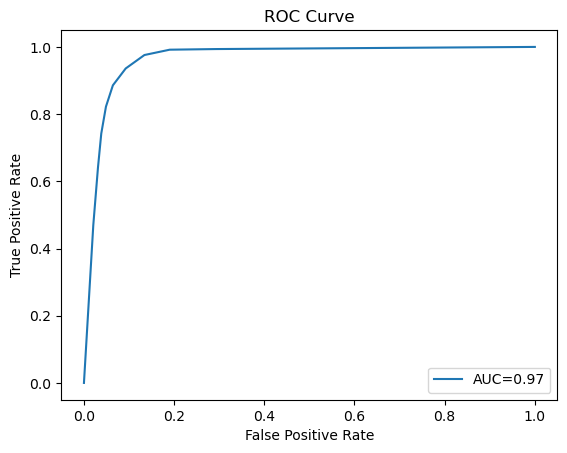

In [133]:
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## OBSERVATION:
 In conclusion, all three algorithms,KNN, Decision Tree, and Logistic Regression, demonstrate strong  performance and can be considered for credit scoring. However, KNN stands out with the highest AUC, consistent ROC performance, and strong accuracy. Therefore, KNN IS THE BEST FIT FOR THIS MODEL.

# Random Forest Algorithm

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [138]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\gowth\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [139]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42)

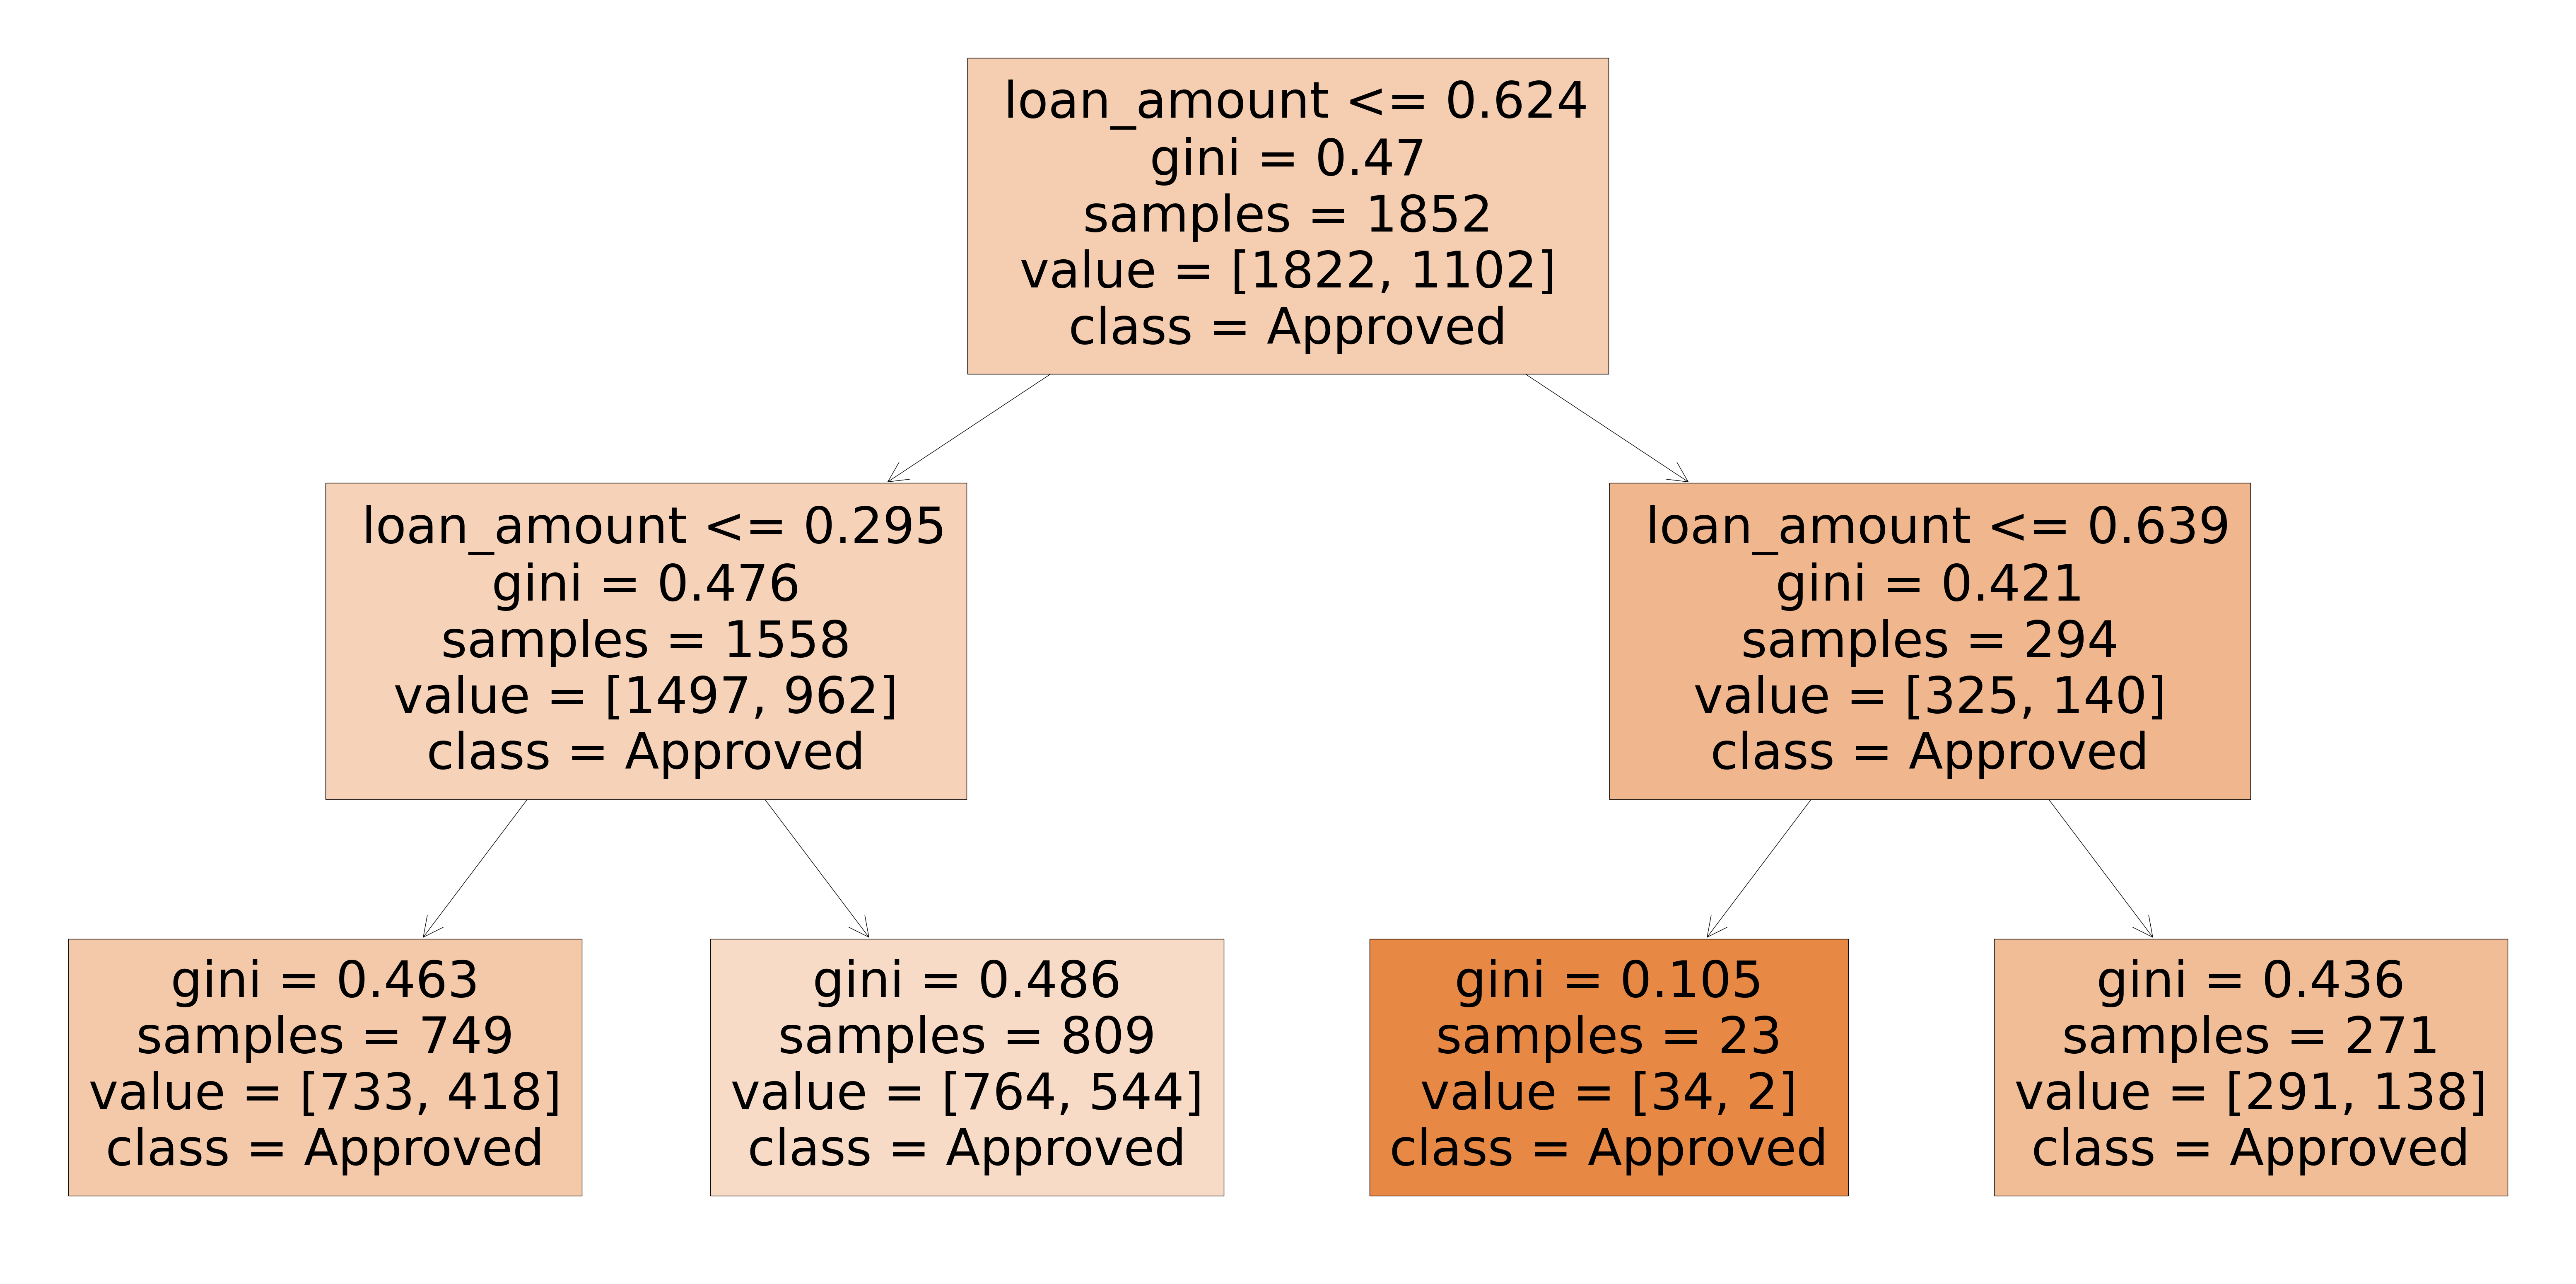

In [140]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[2], feature_names = X.columns,class_names=['Approved', "Rejected"],filled=True);

In [141]:
rf_best.feature_importances_

array([0.64170379, 0.13182108, 0.22647513])

In [142]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,cibil_score,0.641704
2,loan_term,0.226475
1,loan_amount,0.131821


In [145]:
rf.fit(X_train,y_train)

C:\Users\gowth\AppData\Local\Temp\ipykernel_7792\1593328843.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [146]:
test_pred=rf.predict(X_test)

In [147]:
test_pred

array([0, 1, 1, ..., 0, 0, 1])

In [3]:
import pandas as pd
import numpy as np

In [12]:
a=pd.Series([1,2,3,4,5,6,7,1000])
q1 = a.quantile(0.25)
q3 = a.quantile(0.75)
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr

for i in a:
    if i<lb or i>ub:
        print(i)

1000


In [13]:
[item for item in a if item<lb or item>ub]

[1000]